## Question #1 (50 points)

***This question consists of plotting and a conceptual question. Pull code from homework and midterms to optimize your effort.***

For the following potential energy for anharmonically coupled oscillators, create a figure that superimposes

* a contour plot of the potential energy, and;
* the trajectory of $Q_1$ and $Q_2$.

### Point breakdown

* Contour plot (20 points)
* Trajectory plot (20 points)
* Physical explanation (10 points)

### The potential energy

$$ \Delta U = \frac{1}{2} K_1 Q_1^2 + \frac{1}{2} K_2 Q_2^2 + \frac{1}{3} C Q_1 Q_2^2 $$

### Constrained parameters and initial conditions

Take $K_1 = 1$, $K_2 = 0.2$, $M_1 = M_2 = 1$, and $C=0.5$. For the initial conditions, take $Q_1(0) = 0$, $Q_2(0) = 1$, and both velocities starting at zero.

### Plotting constraints
Plot $Q_1$ and $Q_2$ on the horizontal and vertical axes, respectively. I suggest a meshgrid of at least $100 \times 100$ points.

For your contour plot, combine `plt.contour` and `plt.contourf` with code similar to the following:

* `plt.contourf(Q1_grid, Q2_grid, U_grid, levels=50, cmap='viridis')`
* `plt.contour(Q1_grid, Q2_grid, U_grid, levels=50, colors='white', linewidths=1)`

Also, use `plt.xlim(-1.5, 1.5)` and `plt.ylim(-1.5, 1.5)`

Don't forget to label your axes.

### Getting and plotting the trajectory

To get the trajectory, you will need to set up and solve the equations of motion, as we did in previous homework and in class. Then you can plot $Q_2$ versus $Q_1$ with `matplotlib` using a line of code similar to `plt.plot(Q1, Q2, color='red', label="Trajectory")`.

Plot the trajectory from $t=0$ to $t=50$, with an appropriate choice of mesh points to ensure the trajectory is resolved. (e.g. `t_mesh = np.linspace(0, 50, 200)`)

### Physical explanation

With your code complete, you can test four cases for the initial conditions (all with the initial velocity set to zero):

1. $Q_1(0) = 0$, $Q_2(0) = 1$ (**submit this plot**)
2. $Q_1(0) = 0$, $Q_2(0) = -1$
3. $Q_1(0) = 1$, $Q_2(0) = 0$
4. $Q_1(0) = -1$, $Q_2(0) = 0$

Why do the dynamics differ when only $Q_1$ is initially displaced compared to when only $Q_2$ is initially displaced? How does this relate to the coupling term in the potential energy? What is the physical interpretation? You could use our cylindrical beam example from class to describe this, if you like.


In [1]:
# Init conditions
k1 = 1
k2 = 0.2
m1 = 1
m2 = 1
c = 0.5
v1_0 = 0
v2_0 = 0

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [3]:
#Potential energy function

def potential_energy(q1, q2):
    return (0.5 * k1 * q1 ** 2) + (0.5 * k2 * q2 ** 2) + ((1 / 3) * c * q1 * q2 ** 2)

In [4]:
# Create meshgrid for Q1 and Q2

q1_range = np.linspace(-1.5, 1.5, 100)  # Range for Q1 (100 x 100)
q2_range = np.linspace(-1.5, 1.5, 100)  # Range for Q2
q1_grid, q2_grid = np.meshgrid(q1_range, q2_range)

# Calculate potential energy for grid
pe_grid = potential_energy(q1_grid, q2_grid)

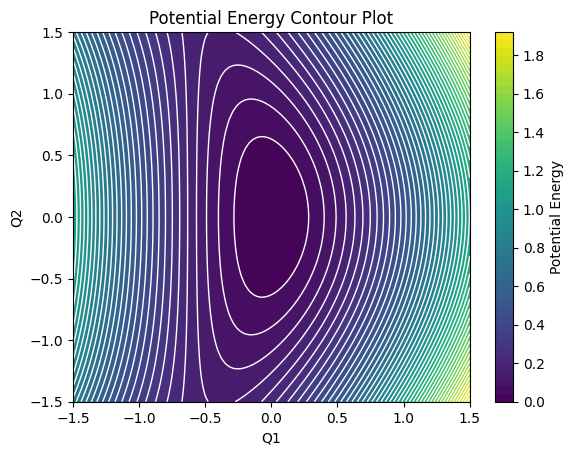

In [5]:
# Plot
def plot_energy():
    cf = plt.contourf(q1_grid, q2_grid, pe_grid, levels=50, cmap='viridis')
    plt.contour(q1_grid, q2_grid, pe_grid, levels=50, colors='white', linewidths=1)
    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)
    plt.xlabel("Q1")
    plt.ylabel("Q2")
    plt.title("Potential Energy Contour Plot")
    plt.colorbar(cf, label="Potential Energy")
    plt.grid(False)

# Show plot
plot_energy()
plt.show()

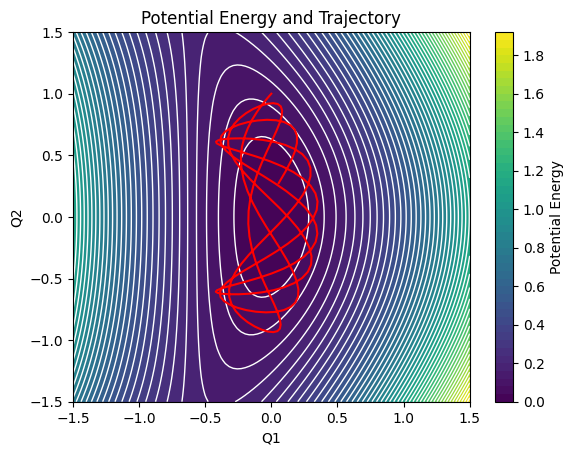

In [7]:
# Equation of motion function

def motion(t, y):
    q1, q1_d, q2, q2_d = y
    q1_dd = -(k1 * q1 + (1 / 3) * c * q2 ** 2) / m1
    q2_dd = -(k2 * q2 + (2 / 3) * c * q1 * q2) / m2

    return [q1_d, q1_dd, q2_d, q2_dd]

# Solve motion function

def solve_motion(q1_0, q2_0):
    y0 = [q1_0, 0, q2_0, 0]
    t = np.linspace(0, 50, 200)
    sol = solve_ivp(motion, (0, 50), y0, t_eval=t)

    return sol.t, sol.y

# Plot motion function

def plot_motion(q1_0, q2_0, color, label):
    t, y = solve_motion(q1_0, q2_0)
    q1, q2 = y[0], y[2]
    plt.plot(q1, q2, color=color, label=label)
    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)
    plt.xlabel("Q1")
    plt.ylabel("Q2")
    plt.title("Potential Energy and Trajectory")
    plt.grid(False)
    

# Plot test case

plot_energy()
plot_motion(0, 1, color='red', label="Q1(0) = 0, Q2(0) = 1")

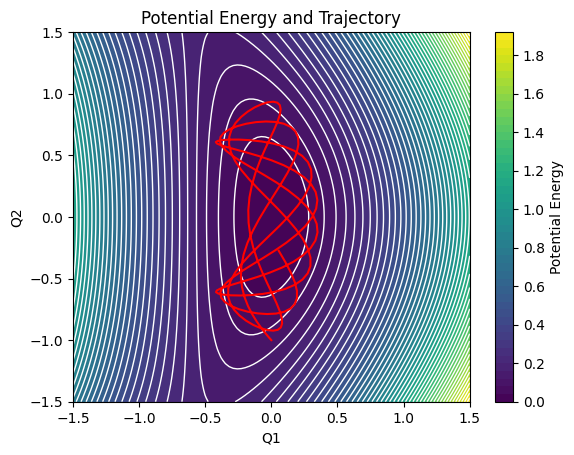

In [8]:
# Case 2

plot_energy()
plot_motion(0, -1, color='red', label="Q1(0) = 0, Q2(0) = 1")

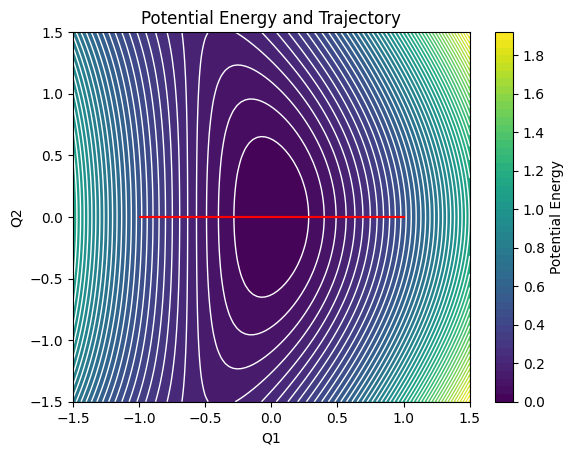

In [ ]:
#Case 3

plot_energy()
plot_motion(1, 0, color='red', label="Q1(0) = 0, Q2(0) = 1")

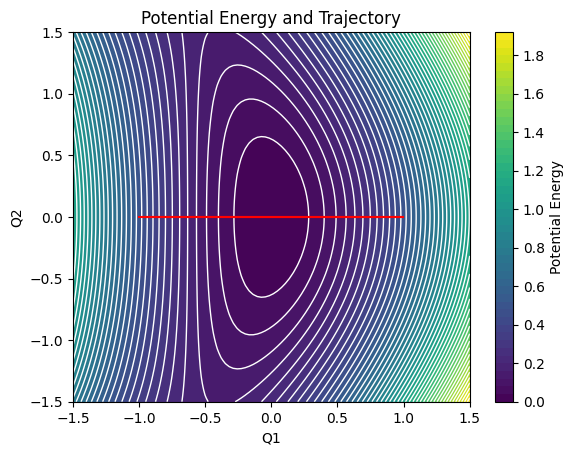

In [ ]:
#Case 4

plot_energy()
plot_motion(-1, 0, color='red', label="Q1(0) = 0, Q2(0) = 1")

The dynamics are different when only Q1 is displaced versus when only Q2 is displaced is due to the coupling term in the potential energy equation. In the coupling term when Q2 is displaced, initially it will be zero, but energy will be transferred to Q1 due to Q2 having a squared term. This means that Q2 does not need much to displace Q1 and affect the coupled oscillation.